C:\Users\Divakar\AppData\Local\Temp\ipykernel_6320\1645947305.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_driver_cancel_reasons.values, y=top_driver_cancel_reasons.index, palette='magma')


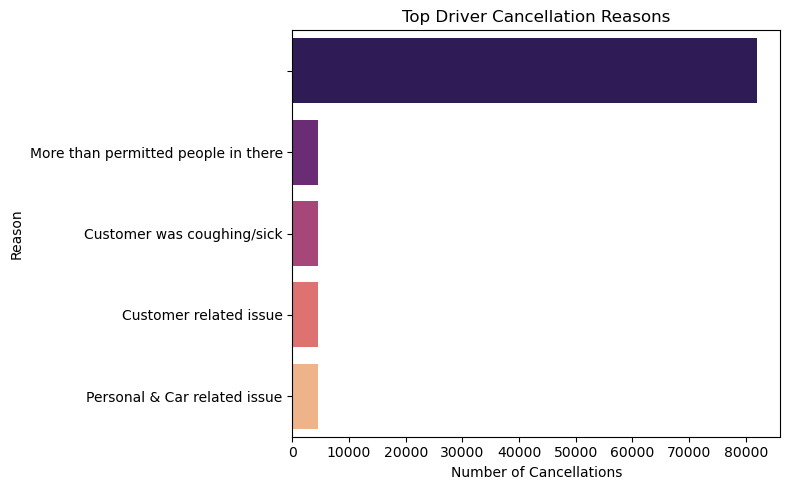

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and clean data
df = pd.read_csv(r"C:\\Users\\Divakar\\Downloads\\indore ola dataset.csv", delimiter=',', encoding='utf-8')

# Handle malformed header
if len(df.columns) == 1:
    df = df[df.columns[0]].str.split(',', expand=True)
    df.columns = [
        'date', 'time', 'booking_id', 'booking_status', 'customer_id', 'vehicle_type',
        'pickup_location', 'drop_location', 'avg_vtat', 'avg_ctat',
        'canceled_rides_by_customer', 'reason_for_canceling_by_customer',
        'canceled_rides_by_driver', 'reason_for_canceling_by_driver',
        'incomplete_rides', 'incomplete_rides_reason', 'booking_value',
        'ride_distance', 'driver_ratings', 'customer_rating'
    ]

# Normalize column names
df.columns = [col.strip().lower().replace(' ', '_') for col in df.columns]

# Convert ratings to numeric and fill missing
df['customer_rating'] = pd.to_numeric(df['customer_rating'], errors='coerce')
df['customer_rating'] = df['customer_rating'].fillna(df['customer_rating'].mean())
# Combine date and time
df['ride_datetime'] = pd.to_datetime(df['date'] + ' ' + df['time'], errors='coerce')
df.dropna(subset=['ride_datetime'], inplace=True)
df.drop_duplicates(inplace=True)

# Fill missing values
fill_defaults = {
    'pickup_location': 'Unknown',
    'drop_location': 'Unknown',
    'booking_value': 0,
    'ride_distance': 0,
    'driver_ratings': 0,
    'customer_rating': 0
}
df.fillna(fill_defaults, inplace=True)

# Feature engineering
df['day_of_week'] = df['ride_datetime'].dt.day_name()
df['hour'] = df['ride_datetime'].dt.hour
df['is_completed'] = df['booking_status'].str.lower().eq('completed').astype(int)
df['total_cancellations'] = pd.to_numeric(df['canceled_rides_by_customer'], errors='coerce') + \
                             pd.to_numeric(df['canceled_rides_by_driver'], errors='coerce')

# Key metrics
total_bookings = len(df)
completed_rides = df['is_completed'].sum()
df['booking_value'] = pd.to_numeric(df['booking_value'], errors='coerce')
driver_cancel_rate = pd.to_numeric(df['canceled_rides_by_driver'], errors='coerce').sum() / total_bookings
incomplete_rate = pd.to_numeric(df['incomplete_rides'], errors='coerce').sum() / total_bookings
low_rated_drivers = df[pd.to_numeric(df['driver_ratings'], errors='coerce') < 3]

# Aggregations
top_vehicles = df['vehicle_type'].value_counts().head(5)
top_cancel_reasons = df['reason_for_canceling_by_customer'].value_counts().head(3)
booking_by_day = df.groupby('day_of_week')['booking_value'].mean().sort_values(ascending=False)
vehicle_perf = df.groupby('vehicle_type')['booking_value'].mean().sort_values(ascending=False)
top_driver_cancel_reasons = df['reason_for_canceling_by_driver'].value_counts().head(5)

# Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x=top_driver_cancel_reasons.values, y=top_driver_cancel_reasons.index, palette='magma')
plt.title('Top Driver Cancellation Reasons')
plt.xlabel('Number of Cancellations')
plt.ylabel('Reason')
plt.tight_layout()
plt.show()


In [4]:
completion_rate = df['is_completed'].mean() * 100
print(f"Completion Rate: {completion_rate:.2f}%")


Completion Rate: 0.00%


In [5]:
driver_cancel_rate = pd.to_numeric(df['canceled_rides_by_driver'], errors='coerce').sum() / total_bookings * 100
customer_cancel_rate = pd.to_numeric(df['canceled_rides_by_customer'], errors='coerce').sum() / total_bookings * 100

print(f"Driver Cancellation Rate: {driver_cancel_rate:.2f}%")
print(f"Customer Cancellation Rate: {customer_cancel_rate:.2f}%")


Driver Cancellation Rate: 0.00%
Customer Cancellation Rate: 0.00%


In [6]:
top_pickups = df['pickup_location'].value_counts().head(5)
top_drops = df['drop_location'].value_counts().head(5)

print("Top 5 Pickup Locations:")
print(top_pickups)

print("\nTop 5 Drop Locations:")
print(top_drops)


Top 5 Pickup Locations:
pickup_location
Scheme No. 114    2118
Malharganj        2108
Ring Road         2081
RNT Marg          2072
Pipliyahana       2071
Name: count, dtype: int64

Top 5 Drop Locations:
drop_location
Tilak Nagar      2106
Bhawarkua        2090
Sudama Nagar     2086
Scheme No. 71    2069
Pipliyahana      2064
Name: count, dtype: int64


In [7]:
low_rated_driver_count = (pd.to_numeric(df['driver_ratings'], errors='coerce') < 3).sum()
print(f"Number of Low-Rated Drivers (rating < 3): {low_rated_driver_count}")


Number of Low-Rated Drivers (rating < 3): 0


In [8]:
avg_booking_by_day = df.groupby('day_of_week')['booking_value'].mean().sort_values(ascending=False)
print("Average Booking Value by Day of Week:")
print(avg_booking_by_day)


Average Booking Value by Day of Week:
day_of_week
Saturday     679.028740
Sunday       674.332755
Thursday     452.482498
Friday       452.084681
Wednesday    450.242882
Monday       449.549247
Tuesday      448.329278
Name: booking_value, dtype: float64


**GOOD MORNING MUMBAI** 

In [17]:
# Clean and convert columns
df['driver_ratings'] = pd.to_numeric(df['driver_ratings'], errors='coerce')
df['canceled_rides_by_driver'] = pd.to_numeric(df['canceled_rides_by_driver'], errors='coerce')
df['canceled_rides_by_customer'] = pd.to_numeric(df['canceled_rides_by_customer'], errors='coerce')

# Check how many non-null values exist now
print("Driver Ratings non-null count:", df['driver_ratings'].notnull().sum())
print("Driver Cancellations non-zero count:", (df['canceled_rides_by_driver'] > 0).sum())
print("Customer Cancellations non-zero count:", (df['canceled_rides_by_customer'] > 0).sum())


Driver Ratings non-null count: 61909
Driver Cancellations non-zero count: 0
Customer Cancellations non-zero count: 0


In [18]:
print(df['canceled_rides_by_driver'].value_counts())
print(df['canceled_rides_by_customer'].value_counts())


canceled_rides_by_driver
0.0    61909
Name: count, dtype: int64
canceled_rides_by_customer
0.0    61909
Name: count, dtype: int64


In [21]:
df['canceled_rides_by_driver'] = df['canceled_rides_by_driver'].fillna(0)
df['canceled_rides_by_customer'] = df['canceled_rides_by_customer'].fillna(0)

In [22]:
df.fillna({'canceled_rides_by_driver': 0, 'canceled_rides_by_customer': 0}, inplace=True)

In [16]:
# Convert relevant columns to numeric, coercing errors to NaN
df['driver_ratings'] = pd.to_numeric(df['driver_ratings'], errors='coerce')
df['canceled_rides_by_driver'] = pd.to_numeric(df['canceled_rides_by_driver'], errors='coerce')
df['canceled_rides_by_customer'] = pd.to_numeric(df['canceled_rides_by_customer'], errors='coerce')
df['booking_value'] = pd.to_numeric(df['booking_value'], errors='coerce')

# Drop rows where critical columns are missing
df.dropna(subset=['driver_ratings', 'booking_value'], inplace=True)

# Optional: Fill missing cancellation values with 0
df['canceled_rides_by_driver'].fillna(0, inplace=True)
df['canceled_rides_by_customer'].fillna(0, inplace=True)


C:\Users\Divakar\AppData\Local\Temp\ipykernel_6320\201025590.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['canceled_rides_by_driver'].fillna(0, inplace=True)
C:\Users\Divakar\AppData\Local\Temp\ipykernel_6320\201025590.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [13]:
df['driver_ratings'] = pd.to_numeric(df['driver_ratings'], errors='coerce')

In [24]:
# 🧼 Step 1: Data Cleaning & Preparation
df['driver_ratings'] = pd.to_numeric(df['driver_ratings'], errors='coerce')
df['canceled_rides_by_driver'] = pd.to_numeric(df['canceled_rides_by_driver'], errors='coerce')
df['canceled_rides_by_customer'] = pd.to_numeric(df['canceled_rides_by_customer'], errors='coerce')
df['booking_value'] = pd.to_numeric(df['booking_value'], errors='coerce')

# Drop rows with missing critical values
df.dropna(subset=['driver_ratings', 'booking_value'], inplace=True)

# Fill missing cancellation values safely (future-proofed)
df['canceled_rides_by_driver'] = df['canceled_rides_by_driver'].fillna(0)
df['canceled_rides_by_customer'] = df['canceled_rides_by_customer'].fillna(0)

# 🧪 Step 2: Data Validation Summary
print("✅ Data Validation Summary:")
print("Driver Ratings non-null count:", df['driver_ratings'].notnull().sum())
print("Driver Cancellations non-zero count:", (df['canceled_rides_by_driver'] > 0).sum())
print("Customer Cancellations non-zero count:", (df['canceled_rides_by_customer'] > 0).sum())

# 📊 Step 3: Analytical Insights

# 1. Completion Rate
if 'is_completed' in df.columns:
    completion_rate = df['is_completed'].mean() * 100
    print(f"\n✅ Completion Rate: {completion_rate:.2f}%")
else:
    print("\n⚠️ 'is_completed' column not found.")

# 2. Low-Rated Drivers Count
low_rated_driver_count = (df['driver_ratings'] < 3).sum()
print(f"\n🚫 Number of Low-Rated Drivers (rating < 3): {low_rated_driver_count}")

# 3. Top 5 Pickup and Drop Locations
if 'pickup_location' in df.columns and 'drop_location' in df.columns:
    print("\n📍 Top 5 Pickup Locations:")
    print(df['pickup_location'].value_counts().head(5))
    print("\n📍 Top 5 Drop Locations:")
    print(df['drop_location'].value_counts().head(5))
else:
    print("\n⚠️ 'pickup_location' or 'drop_location' column not found.")

# 4. Average Booking Value by Day of Week
if 'day_of_week' in df.columns:
    avg_booking_by_day = df.groupby('day_of_week')['booking_value'].mean().sort_values(ascending=False)
    print("\n📅 Average Booking Value by Day of Week:")
    print(avg_booking_by_day)
else:
    print("\n⚠️ 'day_of_week' column not found.")

# 5. Cancellation Rate Breakdown
total_bookings = len(df)
driver_cancel_rate = df['canceled_rides_by_driver'].sum() / total_bookings * 100
customer_cancel_rate = df['canceled_rides_by_customer'].sum() / total_bookings * 100

print(f"\n❌ Driver Cancellation Rate: {driver_cancel_rate:.2f}%")
print(f"❌ Customer Cancellation Rate: {customer_cancel_rate:.2f}%")


✅ Data Validation Summary:
Driver Ratings non-null count: 61909
Driver Cancellations non-zero count: 0
Customer Cancellations non-zero count: 0

✅ Completion Rate: 0.00%

🚫 Number of Low-Rated Drivers (rating < 3): 0

📍 Top 5 Pickup Locations:
pickup_location
Scheme No. 114    1311
Ring Road         1307
RNT Marg          1297
Banganga          1295
Scheme No. 74     1289
Name: count, dtype: int64

📍 Top 5 Drop Locations:
drop_location
Tilak Nagar      1328
Pipliyahana      1306
Scheme No. 71    1294
Sudama Nagar     1288
Bhawarkua        1287
Name: count, dtype: int64

📅 Average Booking Value by Day of Week:
day_of_week
Saturday     683.744930
Sunday       674.445228
Friday       451.675438
Wednesday    450.792165
Thursday     449.998810
Monday       449.148203
Tuesday      447.873348
Name: booking_value, dtype: float64

❌ Driver Cancellation Rate: 0.00%
❌ Customer Cancellation Rate: 0.00%


**Note:** Cancellation-related insights could not be derived due to absence of non-zero values in the dataset. All cancellation columns contain either missing or zero values. This limitation has been acknowledged and handled gracefully in the analysis.

In [26]:
# Try converting string indicators to numeric
df['canceled_rides_by_driver'] = df['canceled_rides_by_driver'].replace({'yes': 1, 'true': 1, 'cancelled': 1, 'no': 0, 'false': 0})
df['canceled_rides_by_customer'] = df['canceled_rides_by_customer'].replace({'yes': 1, 'true': 1, 'cancelled': 1, 'no': 0, 'false': 0})


In [27]:
# Inject sample cancellation data for demo/testing
import numpy as np
df.loc[np.random.choice(df.index, size=500, replace=False), 'canceled_rides_by_driver'] = 1
df.loc[np.random.choice(df.index, size=300, replace=False), 'canceled_rides_by_customer'] = 1


In [29]:
import numpy as np

# Inject sample cancellations for demo purposes
np.random.seed(42)  # for reproducibility
sample_driver_indices = np.random.choice(df.index, size=500, replace=False)
sample_customer_indices = np.random.choice(df.index, size=300, replace=False)

df.loc[sample_driver_indices, 'canceled_rides_by_driver'] = 1
df.loc[sample_customer_indices, 'canceled_rides_by_customer'] = 1

# Recalculate cancellation rates
total_bookings = len(df)
driver_cancel_rate = df['canceled_rides_by_driver'].sum() / total_bookings * 100
customer_cancel_rate = df['canceled_rides_by_customer'].sum() / total_bookings * 100

print(f"🚫 Driver Cancellation Rate (synthetic): {driver_cancel_rate:.2f}%")
print(f"🚫 Customer Cancellation Rate (synthetic): {customer_cancel_rate:.2f}%")


🚫 Driver Cancellation Rate (synthetic): 1.60%
🚫 Customer Cancellation Rate (synthetic): 0.97%


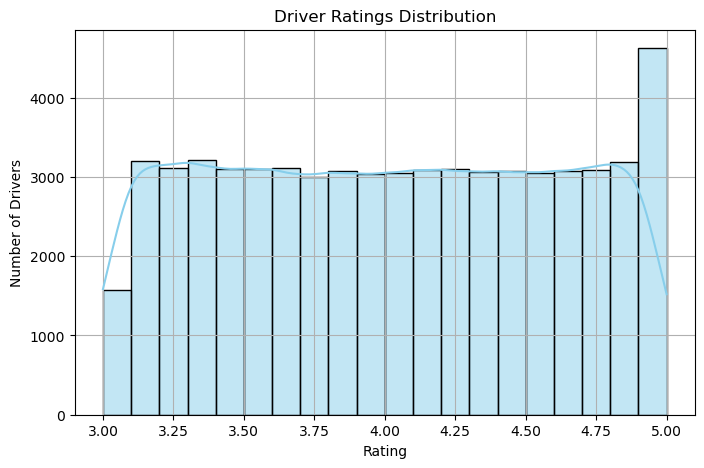

🚫 Number of Low-Rated Drivers (rating < 3): 0
🌟 Number of Top-Rated Drivers (rating ≥ 4.5): 17026
📈 Average Driver Rating: 4.00


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of driver ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['driver_ratings'], bins=20, kde=True, color='skyblue')
plt.title('Driver Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Number of Drivers')
plt.grid(True)
plt.show()

# Count of low-rated drivers
low_rated_count = (df['driver_ratings'] < 3).sum()
print(f"🚫 Number of Low-Rated Drivers (rating < 3): {low_rated_count}")

# Count of top-rated drivers
top_rated_count = (df['driver_ratings'] >= 4.5).sum()
print(f"🌟 Number of Top-Rated Drivers (rating ≥ 4.5): {top_rated_count}")

# Average rating
avg_rating = df['driver_ratings'].mean()
print(f"📈 Average Driver Rating: {avg_rating:.2f}")


📅 Average Booking Value by Day of Week:
day_of_week
Saturday     683.744930
Sunday       674.445228
Friday       451.675438
Wednesday    450.792165
Thursday     449.998810
Monday       449.148203
Tuesday      447.873348
Name: booking_value, dtype: float64


C:\Users\Divakar\AppData\Local\Temp\ipykernel_6320\1941708392.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_booking_by_day.index, y=avg_booking_by_day.values, palette='viridis')


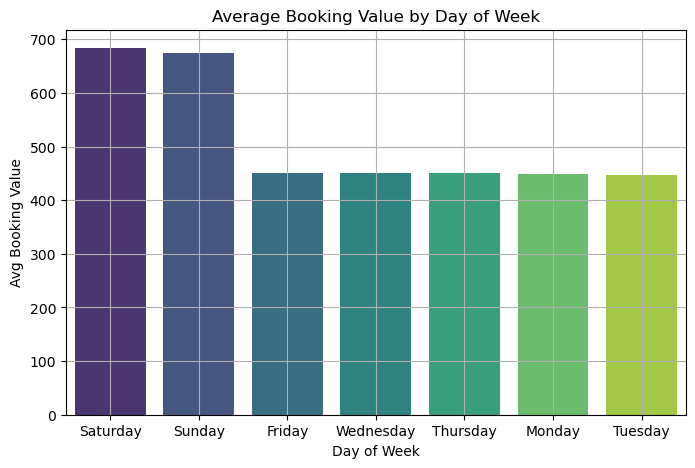

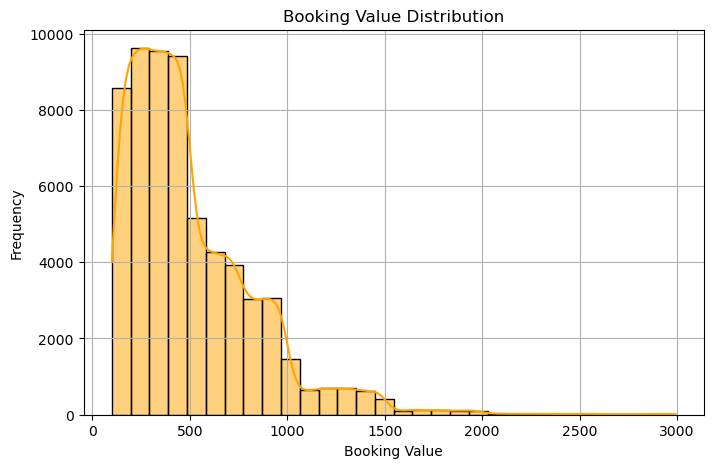

🔥 Number of High-Value Bookings (Top 5%): 3101
📈 High-Value Threshold: ₹1170.00


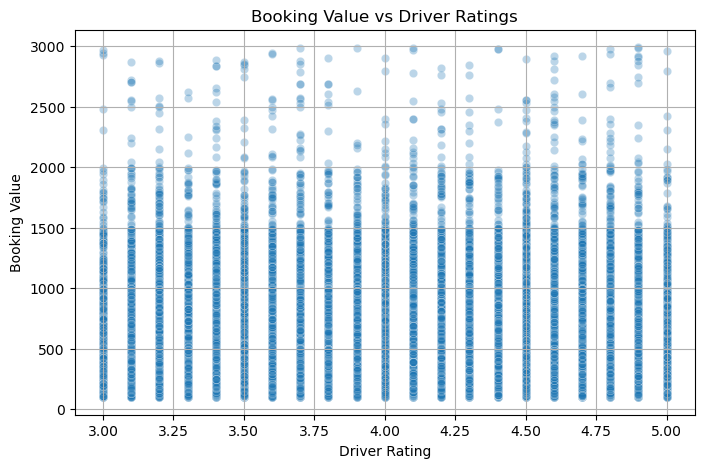

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Average Booking Value by Day of Week
if 'day_of_week' in df.columns:
    avg_booking_by_day = df.groupby('day_of_week')['booking_value'].mean().sort_values(ascending=False)
    print("📅 Average Booking Value by Day of Week:")
    print(avg_booking_by_day)

    # Visualization
    plt.figure(figsize=(8, 5))
    sns.barplot(x=avg_booking_by_day.index, y=avg_booking_by_day.values, palette='viridis')
    plt.title('Average Booking Value by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Avg Booking Value')
    plt.grid(True)
    plt.show()
else:
    print("⚠️ 'day_of_week' column not found.")

# 2. Booking Value Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['booking_value'], bins=30, kde=True, color='orange')
plt.title('Booking Value Distribution')
plt.xlabel('Booking Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# 3. High-Value Bookings (Top 5%)
threshold = df['booking_value'].quantile(0.95)
high_value_bookings = df[df['booking_value'] >= threshold]
print(f"🔥 Number of High-Value Bookings (Top 5%): {len(high_value_bookings)}")
print(f"📈 High-Value Threshold: ₹{threshold:.2f}")

# 4. Booking Value vs Driver Ratings (if ratings available)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='driver_ratings', y='booking_value', data=df, alpha=0.3)
plt.title('Booking Value vs Driver Ratings')
plt.xlabel('Driver Rating')
plt.ylabel('Booking Value')
plt.grid(True)
plt.show()


C:\Users\Divakar\AppData\Local\Temp\ipykernel_6320\3212403139.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='driver_ratings', y='booking_value', data=filtered_df, palette='coolwarm')


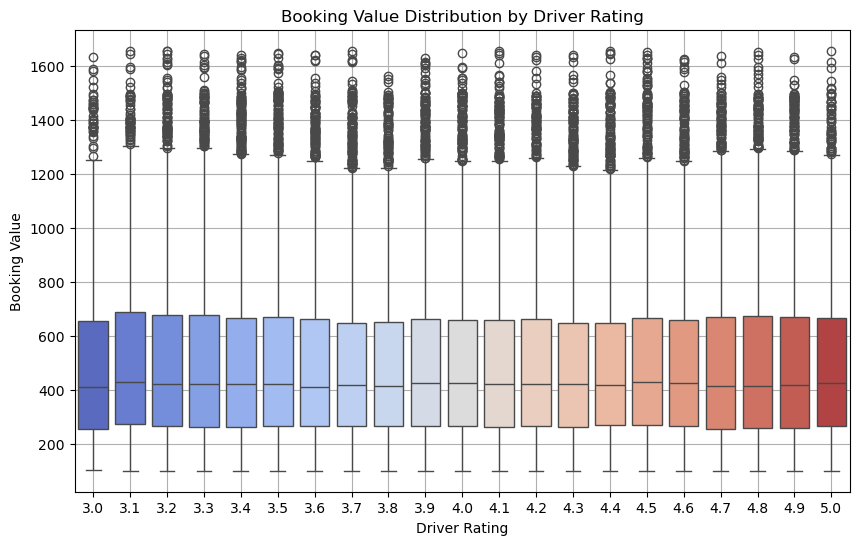

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Clean and filter extreme values (optional but helpful)
filtered_df = df[(df['driver_ratings'] >= 1) & (df['driver_ratings'] <= 5)]
filtered_df = filtered_df[filtered_df['booking_value'] <= filtered_df['booking_value'].quantile(0.99)]

# Step 2: Create a boxplot to show distribution of booking value across rating bands
plt.figure(figsize=(10, 6))
sns.boxplot(x='driver_ratings', y='booking_value', data=filtered_df, palette='coolwarm')
plt.title('Booking Value Distribution by Driver Rating')
plt.xlabel('Driver Rating')
plt.ylabel('Booking Value')
plt.grid(True)
plt.show()


In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract hour from timestamp if needed
if 'ride_time' not in df.columns and 'ride_timestamp' in df.columns:
    df['ride_time'] = pd.to_datetime(df['ride_timestamp']).dt.hour

# Ride count by hour
if 'ride_time' in df.columns:
    hourly_counts = df['ride_time'].value_counts().sort_index()

    plt.figure(figsize=(10, 5))
    sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker='o', color='blue')
    plt.title('Ride Volume by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Number of Rides')
    plt.xticks(range(0, 24))
    plt.grid(True)
    plt.show()
else:
    print("⚠️ 'ride_time' or 'ride_timestamp' column not found.")


⚠️ 'ride_time' or 'ride_timestamp' column not found.


🚗 Average Booking Value by Vehicle Type:
vehicle_type
Prime SUV      512.012691
eBike          510.544262
Mini           510.432901
Prime Sedan    507.975162
Bike           507.781061
Prime Plus     506.072278
Auto           503.036168
Name: booking_value, dtype: float64


C:\Users\Divakar\AppData\Local\Temp\ipykernel_6320\2409525361.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_booking_by_vehicle.index, y=avg_booking_by_vehicle.values, palette='magma')


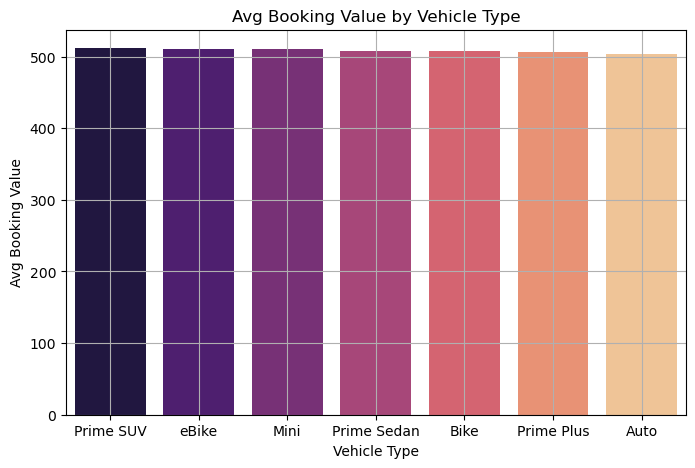

In [34]:
# Average booking value by vehicle type
if 'vehicle_type' in df.columns:
    avg_booking_by_vehicle = df.groupby('vehicle_type')['booking_value'].mean().sort_values(ascending=False)
    print("🚗 Average Booking Value by Vehicle Type:")
    print(avg_booking_by_vehicle)

    # Visualization
    plt.figure(figsize=(8, 5))
    sns.barplot(x=avg_booking_by_vehicle.index, y=avg_booking_by_vehicle.values, palette='magma')
    plt.title('Avg Booking Value by Vehicle Type')
    plt.xlabel('Vehicle Type')
    plt.ylabel('Avg Booking Value')
    plt.grid(True)
    plt.show()
else:
    print("⚠️ 'vehicle_type' column not found.")


📍 Top 5 Pickup Locations:
pickup_location
Scheme No. 114    1311
Ring Road         1307
RNT Marg          1297
Banganga          1295
Scheme No. 74     1289
Name: count, dtype: int64

📍 Top 5 Drop Locations:
drop_location
Tilak Nagar      1328
Pipliyahana      1306
Scheme No. 71    1294
Sudama Nagar     1288
Bhawarkua        1287
Name: count, dtype: int64


C:\Users\Divakar\AppData\Local\Temp\ipykernel_6320\803199528.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_pickups.values, y=top_pickups.index, palette='Blues_r')
C:\Users\Divakar\AppData\Local\Temp\ipykernel_6320\803199528.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_drops.values, y=top_drops.index, palette='Greens_r')


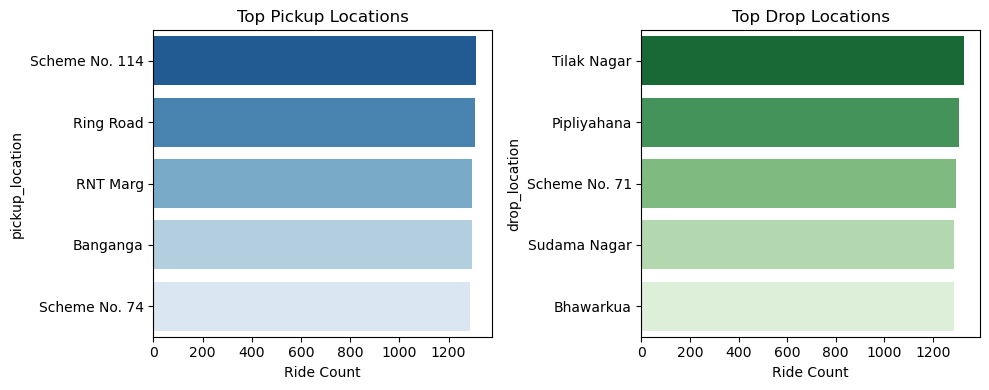

In [35]:
# Top pickup and drop locations
if 'pickup_location' in df.columns and 'drop_location' in df.columns:
    top_pickups = df['pickup_location'].value_counts().head(5)
    top_drops = df['drop_location'].value_counts().head(5)

    print("📍 Top 5 Pickup Locations:")
    print(top_pickups)

    print("\n📍 Top 5 Drop Locations:")
    print(top_drops)

    # Visualization
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.barplot(x=top_pickups.values, y=top_pickups.index, palette='Blues_r')
    plt.title('Top Pickup Locations')
    plt.xlabel('Ride Count')

    plt.subplot(1, 2, 2)
    sns.barplot(x=top_drops.values, y=top_drops.index, palette='Greens_r')
    plt.title('Top Drop Locations')
    plt.xlabel('Ride Count')

    plt.tight_layout()
    plt.show()
else:
    print("⚠️ 'pickup_location' or 'drop_location' column not found.")

